In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split



In [ ]:
PATH_TRAIN = 'drive/MyDrive/СпецПрога/4 Regression/data/Price_euros_train.csv'
PATH_TEST = 'drive/MyDrive/СпецПрога/4 Regression/data/Price_euros_test.csv'

##Feature extraction

In [ ]:
data_train = pd.read_csv(PATH_TRAIN)
data_train.head(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
5,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
6,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.90
7,12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,344.99
8,13,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,NaN,1.83kg,2439.97
9,14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,498.90


In [ ]:
def get_value(x):
    gb = 0
    tb = 0
    if ('GB' in x):
        gb = float(x.split('GB')[0])
    if ('TB' in x):
        tb = float(x.split('TB')[0])
    return gb + tb * 1024

In [ ]:
def memory(x):
    hdd, ssd, flash = 0, 0, 0
    x = x.split(' + ')
    for mem in x:
        if ('Flash' in mem):
            value = mem.split('Flash')[0]
            flash += get_value(mem)
        if ('SSD' in mem):
            value = mem.split('SSD')[0]
            ssd += get_value(mem)
        if ('HDD' in mem):
            value = mem.split('HDD')[0]
            hdd += get_value(mem)
    return {'hdd': hdd, 'ssd': ssd, 'flash': flash}

In [ ]:
def get_gpu(x):
    if ('Intel' in x):
        return 'Intel'
    elif ('Nvidia' in x):
        return 'Nvidia'
    elif ('AMD' in x):
        return 'AMD'

In [ ]:
print(data_train.shape)
print((data_train['Cpu'].str.split().str[-1].str[-3:] == 'GHz').sum(), 'cpu') # Частота везде в ГГц
print((data_train['Ram'].str[-2:] == 'GB').values.sum(), 'ram') # оперативка в Гб везде
print((data_train['Weight'].str[-2:] == 'kg').values.sum(), 'weight') # Вес почти везде в кг
print((data_train['Gpu'].str.split().str[0] == 'Intel').sum(), 
      (data_train['Gpu'].str.split().str[0] == 'AMD').sum(),
      (data_train['Gpu'].str.split().str[0] == 'Nvidia').sum(), # 1107 видюшек
      'gpu')
print((data_train['ScreenResolution'].str.split().str[-1].str.count('x') == 1).sum(), 'screen') # размеры экрана

(1108, 13)
1108 cpu
1108 ram
1086 weight
611 156 340 gpu
1097 screen


In [ ]:
# видно, что вес везде в кг, за исключением пропущенных значений (1086+22=1108)
# то же самое для экрана (1097+11=1108)
data_train.isna().sum()

laptop_ID            0
Company              0
Product              0
TypeName             0
Inches               0
ScreenResolution    11
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys               53
Weight              22
Price_euros          0
dtype: int64

In [ ]:
data_train['Cpu'] = data_train['Cpu'].str.split().str[-1].str[:-3].astype('float')
data_train['Ram'] = data_train['Ram'].str[:-2].astype('float')
data_train['Weight'] = data_train['Weight'].str[:-2].astype('float')
data_train['Gpu'] = data_train['Gpu'].apply(lambda x: get_gpu(x))

In [ ]:
data_memory = {i: memory(data_train['Memory'].values[i]) for i in range(data_train.shape[0])}
data_memory = pd.DataFrame(data_memory).T
data_memory.head(20)

,hdd,ssd,flash
0,0.0,0.0,128.0
1,0.0,512.0,0.0
2,0.0,256.0,0.0
3,500.0,0.0,0.0
4,0.0,0.0,256.0
5,0.0,512.0,0.0
6,500.0,0.0,0.0
7,500.0,0.0,0.0
8,0.0,256.0,0.0
9,0.0,256.0,0.0


In [ ]:
data_train['ScreenResolution'] = data_train['ScreenResolution'].str.split().str[-1].str.split('x')
data_train['screen_width'] = data_train['ScreenResolution'].str[0].astype('float')
data_train['screen_height'] = data_train['ScreenResolution'].str[1].astype('float')
data_train = pd.merge(data_train, data_memory, left_index=True, right_index=True, how='left')
data_train.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,screen_width,screen_height,hdd,ssd,flash
0,2,Apple,Macbook Air,Ultrabook,13.3,"[1440, 900]",1.8,8.0,128GB Flash Storage,Intel,macOS,1.34,898.94,1440.0,900.0,0.0,0.0,128.0
1,4,Apple,MacBook Pro,Ultrabook,15.4,"[2880, 1800]",2.7,16.0,512GB SSD,AMD,macOS,1.83,2537.45,2880.0,1800.0,0.0,512.0,0.0
2,5,Apple,MacBook Pro,Ultrabook,13.3,"[2560, 1600]",3.1,8.0,256GB SSD,Intel,macOS,1.37,1803.60,2560.0,1600.0,0.0,256.0,0.0
3,6,Acer,Aspire 3,Notebook,15.6,"[1366, 768]",3.0,4.0,500GB HDD,AMD,Windows 10,2.10,400.00,1366.0,768.0,500.0,0.0,0.0
4,7,Apple,MacBook Pro,Ultrabook,15.4,"[2880, 1800]",2.2,16.0,256GB Flash Storage,Intel,Mac OS X,2.04,2139.97,2880.0,1800.0,0.0,0.0,256.0


In [ ]:
print(len(data_train['Company'].unique()))
print(len(data_train['Product'].unique())) # слишком много различных
print(len(data_train['TypeName'].unique()))
print(len(data_train['OpSys'].unique()))

18
548
6
10


In [ ]:
data_train.shape

(1108, 18)

In [ ]:
# Оставим только численные признаки и категориальные
data_train = data_train.drop(columns=['laptop_ID', 'Product', 'Memory', 'ScreenResolution'])
data_train.isna().sum()

Company           0
TypeName          0
Inches            0
Cpu               0
Ram               0
Gpu               1
OpSys            53
Weight           22
Price_euros       0
screen_width     11
screen_height    11
hdd               0
ssd               0
flash             0
dtype: int64

In [ ]:
data_train.dtypes

Company           object
TypeName          object
Inches           float64
Cpu              float64
Ram              float64
Gpu               object
OpSys             object
Weight           float64
Price_euros      float64
screen_width     float64
screen_height    float64
hdd              float64
ssd              float64
flash            float64
dtype: object

In [ ]:
# Заполним пропуски средними значениями
data_train['Weight'].fillna(data_train['Weight'].mean(), inplace=True)
data_train['screen_width'].fillna(data_train['screen_width'].mean(), inplace=True)
data_train['screen_height'].fillna(data_train['screen_height'].mean(), inplace=True)
weight_mean = data_train['Weight'].mean()
screen_width_mean = data_train['screen_width'].mean()
screen_height_mean = data_train['screen_height'].mean()

In [ ]:
def scale(data_train, data_test, name_col):
    m = data_train[name_col].mean()
    std = data_train[name_col].std()
    return (data_test[name_col] - m) / std

In [ ]:
data_train_scaled = data_train.copy()
for col in data_train.columns.values:
    if (col != 'Price_euros' and type(data_train[col][0]) != str):
        data_train_scaled[col] = scale(data_train, data_train_scaled, col)

##Feature analysis

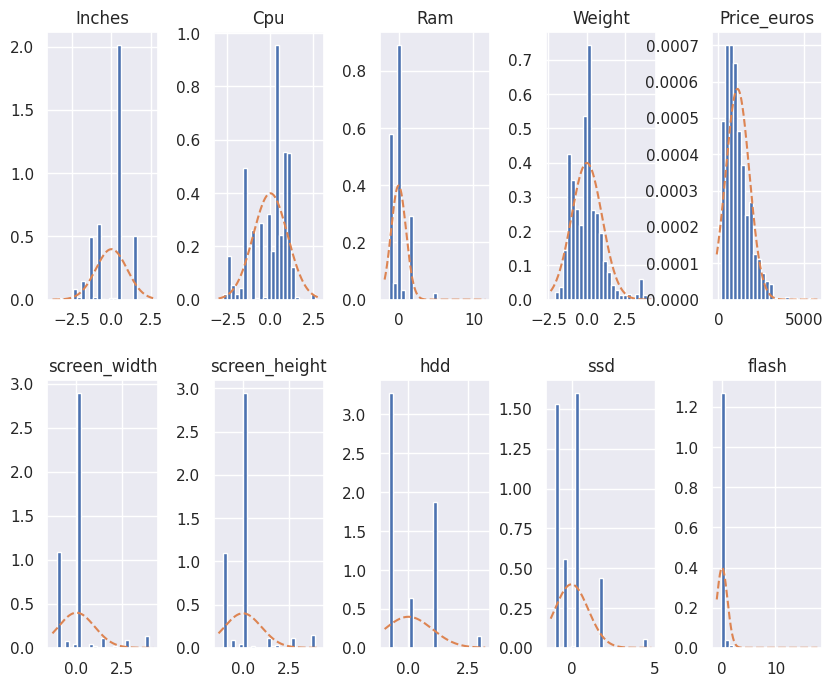

In [ ]:
keys = data_train_scaled.select_dtypes(include=['int64', 'float64']).columns.values
keys = list(keys)

fig, axes = plt.subplots(2, 5)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
fig.set_size_inches(10, 8)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(data_train_scaled[key], density=True, bins=23)
    
    loc = data_train_scaled[key].mean()
    scale = data_train_scaled[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

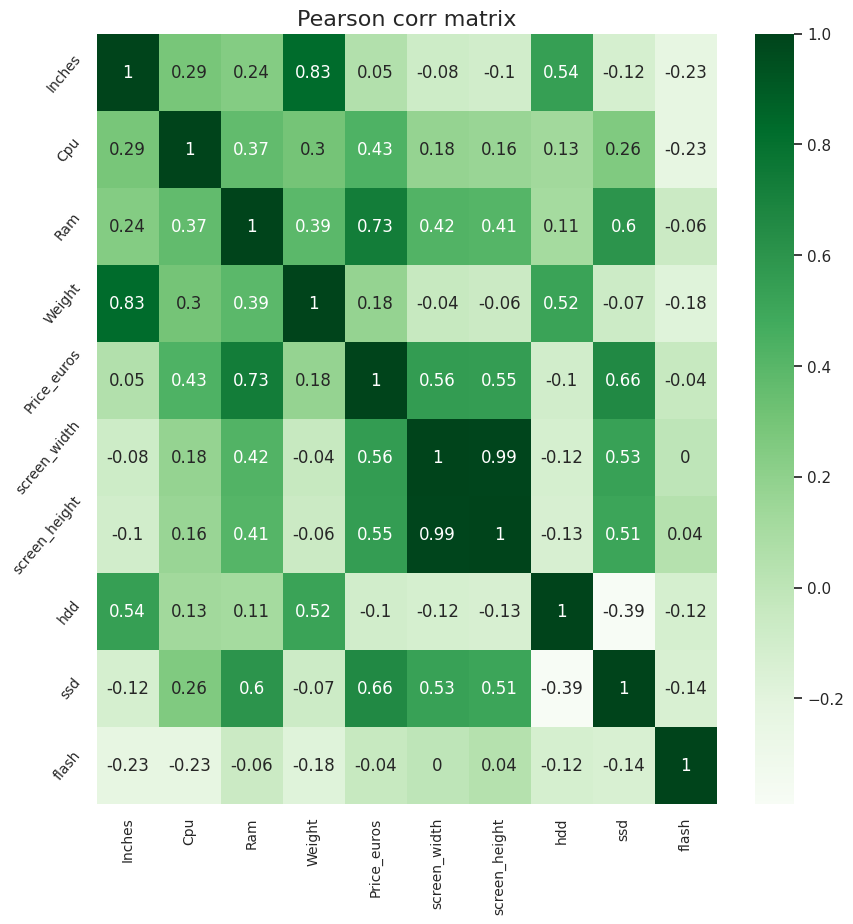

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(data_train_scaled.corr().round(2), annot=True, cmap="Greens")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=50)
plt.title("Pearson corr matrix", fontsize=16)
plt.show()

##OHE Encoding

In [ ]:
data_train_scaled.head(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,screen_width,screen_height,hdd,ssd,flash
0,Apple,Ultrabook,-1.220668,-0.975900,-0.071135,Intel,macOS,-1.064128,898.94,-0.926479,-0.602063,-0.810382,-0.974108,4.141975
1,Apple,Ultrabook,0.258398,0.795556,1.505216,AMD,macOS,-0.316196,2537.45,2.027102,2.602893,-0.810382,1.766728,-0.146597
2,Apple,Ultrabook,-1.220668,1.582870,-0.071135,Intel,macOS,-1.018336,1803.60,1.370750,1.890681,-0.810382,0.396310,-0.146597
3,Acer,Notebook,0.399261,1.386042,-0.859311,AMD,Windows 10,0.095929,400.00,-1.078261,-1.072123,0.130958,-0.974108,-0.146597
4,Apple,Ultrabook,0.258398,-0.188586,1.505216,Intel,Mac OS X,0.004346,2139.97,2.027102,2.602893,-0.810382,-0.974108,8.430548


In [ ]:
columns_object = data_train_scaled.select_dtypes(['object']).columns.values
for col in columns_object:
    ohe = pd.get_dummies(data_train_scaled[col])
    data_train_scaled = pd.merge(data_train_scaled, ohe, left_index=True, right_index=True)
    data_train_scaled.drop(columns=[col], inplace=True)

##Train model

In [ ]:
X, y = data_train_scaled.drop(columns=['Price_euros']), data_train_scaled['Price_euros']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
pred = model.predict(Xtest)

In [ ]:
mean_absolute_error(ytest, pred) ** 2

51995.74982665617

In [ ]:
mean_absolute_percentage_error(ytest, pred)

0.24829614977971162

##Test data

In [ ]:
data_test = pd.read_csv(PATH_TEST)

In [ ]:
data_test.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg


In [ ]:
data_test['Cpu'] = data_test['Cpu'].str.split().str[-1].str[:-3].astype('float')
data_test['Ram'] = data_test['Ram'].str[:-2].astype('float')
data_test['Weight'] = data_test['Weight'].str[:-2].astype('float')
data_test['Gpu'] = data_test['Gpu'].apply(lambda x: get_gpu(x))

In [ ]:
data_test['ScreenResolution'] = data_test['ScreenResolution'].str.split().str[-1].str.split('x')
data_test['screen_width'] = data_test['ScreenResolution'].str[0].astype('float')
data_test['screen_height'] = data_test['ScreenResolution'].str[1].astype('float')
data_memory = {i: memory(data_test['Memory'].values[i]) for i in range(data_test.shape[0])}
data_memory = pd.DataFrame(data_memory).T
data_test = pd.merge(data_test, data_memory, left_index=True, right_index=True)
data_test.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,screen_width,screen_height,hdd,ssd,flash
0,86,Acer,Aspire 3,Notebook,15.6,"[1366, 768]",3.0,4.0,1TB HDD,AMD,Windows 10,2.10,1366.0,768.0,1024.0,0.0,0.0
1,1249,Razer,Blade Pro,Gaming,14.0,"[1920, 1080]",2.8,16.0,1TB SSD,Nvidia,Windows 10,1.95,1920.0,1080.0,0.0,1024.0,0.0
2,122,Asus,VivoBook S15,Notebook,15.6,"[1920, 1080]",1.8,8.0,256GB SSD,Nvidia,Windows 10,1.70,1920.0,1080.0,0.0,256.0,0.0
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,"[1920, 1080]",2.8,16.0,256GB SSD + 1TB HDD,Nvidia,Windows 10,2.99,1920.0,1080.0,1024.0,256.0,0.0
4,739,Dell,Inspiron 3567,Notebook,15.6,"[1366, 768]",2.5,12.0,1TB HDD,Intel,Windows 10,2.25,1366.0,768.0,1024.0,0.0,0.0


In [ ]:
data_test.shape

(195, 17)

In [ ]:
data_test = data_test.drop(columns=['laptop_ID', 'Product', 'Memory', 'ScreenResolution'])

data_test.isna().sum()

Company           0
TypeName          0
Inches            0
Cpu               0
Ram               0
Gpu               0
OpSys            12
Weight            4
screen_width      2
screen_height     2
hdd               0
ssd               0
flash             0
dtype: int64

In [ ]:
data_test['Weight'].fillna(weight_mean, inplace=True)
data_test['screen_width'].fillna(screen_width_mean, inplace=True)
data_test['screen_height'].fillna(screen_height_mean, inplace=True)

In [ ]:
def scale(data_train, data_test, name_col):
    m = data_train[name_col].mean()
    std = data_train[name_col].std()
    return (data_test[name_col] - m) / std

data_test_scaled = data_test.copy()
for col in data_test.columns.values:
    if (type(data_test[col][0]) != str):
        data_test_scaled[col] = scale(data_train, data_test, col)

In [ ]:
columns_object = data_test_scaled.select_dtypes(['object']).columns.values
for col in columns_object:
    ohe = pd.get_dummies(data_test_scaled[col])
    data_test_scaled = pd.merge(data_test_scaled, ohe, left_index=True, right_index=True)
    data_test_scaled.drop(columns=[col], inplace=True)

In [ ]:
test_columns = data_test_scaled.columns.values
train_columns = X.columns.values
for col in train_columns:
    if (col not in test_columns):
        data_test_scaled[col] = 0
data_test_scaled = data_test_scaled[train_columns]

In [ ]:
data_test_scaled.shape

(195, 45)

##Predict

In [ ]:
pred = model.predict(data_test_scaled)

In [ ]:
answer = pd.DataFrame({'Price_euros': pred})
answer['Index'] = answer.index
answer = answer[['Index', 'Price_euros']]
answer.head()

,Index,Price_euros
0,0,347.524931
1,1,3188.982365
2,2,785.030572
3,3,1675.883794
4,4,1018.674662


In [ ]:
PATH_ANS = 'drive/MyDrive/СпецПрога/4 Regression/data/answer.csv'
answer.to_csv(PATH_ANS, index=False, sep=',')